In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = torch.tensor(range(-5,5)).float()
x

tensor([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

In [3]:
w_gt = 3
b_gt = 4
y = w_gt*x + b_gt
y

tensor([-11.,  -8.,  -5.,  -2.,   1.,   4.,   7.,  10.,  13.,  16.])

In [4]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(f'w: {w}')
print(f'b: {b}')

w: tensor([0.1365], requires_grad=True)
b: tensor([-0.7934], requires_grad=True)


In [5]:
learning_rate = 0.1

In [6]:
def trainManual(w, b, lr, iternum):
    for i in range(iternum):
        y_hat = w*x + b

        error = torch.sum(torch.pow(y-y_hat,2)/y.numel())
        error.backward()   # Compute the Gradients for w and b (requires_grad=True)
        print(w,w.grad)
        # Update parameters
        with torch.no_grad():   # Temporarily set all requires_grad=False
            w -= lr * w.grad
            b -= lr * b.grad
            # Remember to zero the gradients!
            # If not, the gradients will be accumulated
            w.grad.zero_()
            b.grad.zero_()
        print("Error: {:.4f}".format(error))

In [7]:
trainManual(w, b, learning_rate, 10)

tensor([0.1365], requires_grad=True) tensor([-43.8868])
Error: 78.9493
tensor([4.5251], requires_grad=True) tensor([30.0484])
Error: 43.0398
tensor([1.5203], requires_grad=True) tensor([-22.0106])
Error: 23.8451
tensor([3.7214], requires_grad=True) tensor([14.9265])
Error: 13.4383
tensor([2.2287], requires_grad=True) tensor([-11.0534])
Error: 7.7067
tensor([3.3340], requires_grad=True) tensor([7.4028])
Error: 4.4966
tensor([2.5938], requires_grad=True) tensor([-5.5602])
Error: 2.6672
tensor([3.1498], requires_grad=True) tensor([3.6636])
Error: 1.6063
tensor([2.7834], requires_grad=True) tensor([-2.8029])
Error: 0.9807
tensor([3.0637], requires_grad=True) tensor([1.8079])
Error: 0.6059


In [8]:
w

tensor([2.8829], requires_grad=True)

In [9]:
x

tensor([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

In [10]:
b

tensor([3.4266], requires_grad=True)

In [12]:
y_pred = (w*x + b)
y_pred = y_pred.data.numpy()
print("----- ----- ----- ----- -----")
print("Prediction:")
print("w_pred = {:.2f}, b_pred = {:.2f}".format(w[0] ,b[0]))
print("Ground-truth:")
print("w_gt = {:.2f}, b_gt = {:.2f}".format(w_gt ,b_gt))

----- ----- ----- ----- -----
Prediction:
w_pred = 2.88, b_pred = 3.43
Ground-truth:
w_gt = 3.00, b_gt = 4.00


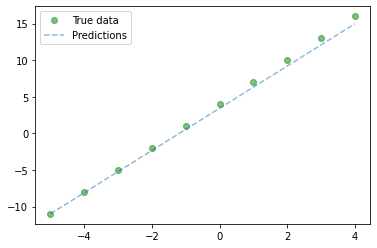

In [13]:
plt.clf()
plt.plot(x, y, 'go', label='True data', alpha=0.5)
plt.plot(x, y_pred, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [14]:
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn

In [15]:
class LinearRegression(torch.nn.Module): 
    def __init__(self):
        super(LinearRegression, self).__init__() 
        self.linear = torch.nn.Linear(1, 1, bias = True) # bias is default True

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [16]:
our_model = LinearRegression()

In [17]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.1) 

In [18]:
def trainBuildIn(model, x, y, iter):
    for i in range(iter):
        # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
        optimizer.zero_grad()
        
        # get output from the model, given the inputs
        y_pred = model(x)

        # get loss for the predicted output
        loss = criterion(y_pred, y)
        print(loss)
        # get gradients w.r.t to parameters
        loss.backward()

        # update parameters
        optimizer.step()

        print('Iter {}, loss {}'.format(iter, loss.item()))

In [19]:
x_train = x[:,None]
y_train = y[:,None]

print(x.shape, x_train.shape)
print(y.shape, y_train.shape)

torch.Size([10]) torch.Size([10, 1])
torch.Size([10]) torch.Size([10, 1])


In [20]:
trainBuildIn(our_model, x_train, y_train, 10)

tensor(108.3725, grad_fn=<MseLossBackward0>)
Iter 10, loss 108.37247467041016
tensor(57.7571, grad_fn=<MseLossBackward0>)
Iter 10, loss 57.75712966918945
tensor(31.2105, grad_fn=<MseLossBackward0>)
Iter 10, loss 31.21048927307129
tensor(17.1268, grad_fn=<MseLossBackward0>)
Iter 10, loss 17.126773834228516
tensor(9.5555, grad_fn=<MseLossBackward0>)
Iter 10, loss 9.555503845214844
tensor(5.4243, grad_fn=<MseLossBackward0>)
Iter 10, loss 5.424336910247803
tensor(3.1334, grad_fn=<MseLossBackward0>)
Iter 10, loss 3.1334052085876465
tensor(1.8410, grad_fn=<MseLossBackward0>)
Iter 10, loss 1.8410495519638062
tensor(1.0992, grad_fn=<MseLossBackward0>)
Iter 10, loss 1.09916353225708
tensor(0.6659, grad_fn=<MseLossBackward0>)
Iter 10, loss 0.6658803224563599


In [21]:
y_pred_bi = our_model(x_train).data.numpy()

print("----- ----- ----- ----- -----")
print("Prediction:")
for name, param in our_model.named_parameters():
    if param.requires_grad:
        print(name, param.data)
print("Ground-truth:")
print("w_gt = {:.2f}, b_gt = {:.2f}".format(w_gt ,b_gt))

----- ----- ----- ----- -----
Prediction:
linear.weight tensor([[2.8641]])
linear.bias tensor([3.4258])
Ground-truth:
w_gt = 3.00, b_gt = 4.00


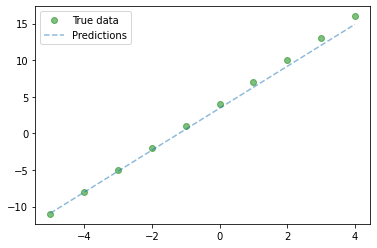

In [22]:
plt.clf()
plt.plot(x, y, 'go', label='True data', alpha=0.5)
plt.plot(x, y_pred_bi, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x[:,None], y[:,None])
print("----- ----- ----- ----- -----")
print("Prediction:")
print("w_pred = {:.2f}, b_pred = {:.2f}".format(float(linr.intercept_), float(linr.coef_[0])))
print("Ground-truth:")
print("w_gt = {:.2f}, b_gt = {:.2f}".format(w_gt ,b_gt))

----- ----- ----- ----- -----
Prediction:
w_pred = 4.00, b_pred = 3.00
Ground-truth:
w_gt = 3.00, b_gt = 4.00
